In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
def plot_eps_trend_illustration():
    """
    Vẽ biểu đồ minh họa trend coefficients cho EPS
    """
    # Tạo dữ liệu ví dụ cho EPS qua 8 quý
    quarters = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 
                'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']
    
    # Ví dụ với 3 cổ phiếu có xu hướng khác nhau
    stocks_data = {
        'Stock A (Tăng trưởng)': [1200, 1350, 1400, 1550, 1650, 1800, 1900, 2100],
        'Stock B (Ổn định)': [1500, 1480, 1520, 1510, 1530, 1540, 1525, 1535],
        'Stock C (Giảm)': [2000, 1850, 1700, 1600, 1400, 1250, 1100, 950]
    }
    
    # Tạo figure với subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Trend Coefficients Illustration for EPS Analysis', fontsize=16, fontweight='bold')
    
    colors = ['#2E8B57', '#4169E1', '#DC143C']  # Green, Blue, Red
    
    # Plot cho từng cổ phiếu
    for idx, (stock_name, eps_values) in enumerate(stocks_data.items()):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        
        # Tạo dữ liệu cho regression
        x = np.arange(len(quarters)).reshape(-1, 1)
        y = np.array(eps_values)
        
        # Tính trend coefficient (slope)
        reg = LinearRegression()
        reg.fit(x, y)
        trend_coef = reg.coef_[0]
        
        # Vẽ dữ liệu gốc
        ax.plot(quarters, eps_values, 'o-', color=colors[idx], linewidth=2, 
                markersize=8, label=f'EPS Values')
        
        # Vẽ trend line
        trend_line = reg.predict(x)
        ax.plot(quarters, trend_line, '--', color='red', linewidth=2, 
                alpha=0.7, label=f'Trend Line (slope={trend_coef:.1f})')
        
        # Formatting
        ax.set_title(f'{stock_name}\nTrend Coefficient: {trend_coef:.2f}', 
                     fontweight='bold', fontsize=12)
        ax.set_ylabel('EPS (VND)', fontsize=10)
        ax.set_xlabel('Quarter', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        
        # Xoay labels
        ax.tick_params(axis='x', rotation=45)
        
        # Thêm annotations
        if trend_coef > 0:
            ax.annotate('Positive Trend\n(Growth)', xy=(6, max(eps_values)*0.9), 
                       fontsize=9, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
                       facecolor='lightgreen', alpha=0.7))
        elif abs(trend_coef) < 20:
            ax.annotate('Stable Trend\n(Sideways)', xy=(6, max(eps_values)*0.9), 
                       fontsize=9, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
                       facecolor='lightblue', alpha=0.7))
        else:
            ax.annotate('Negative Trend\n(Decline)', xy=(6, max(eps_values)*0.9), 
                       fontsize=9, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
                       facecolor='lightcoral', alpha=0.7))
    
    # Plot thứ 4: Summary comparison
    ax4 = axes[1, 1]
    
    # Tính trend coefficients cho tất cả stocks
    trend_coeffs = []
    stock_names = []
    for stock_name, eps_values in stocks_data.items():
        x = np.arange(len(quarters)).reshape(-1, 1)
        y = np.array(eps_values)
        reg = LinearRegression()
        reg.fit(x, y)
        trend_coeffs.append(reg.coef_[0])
        stock_names.append(stock_name.split(' (')[0])  # Chỉ lấy tên stock
    
    # Bar chart so sánh trend coefficients
    bars = ax4.bar(stock_names, trend_coeffs, color=colors, alpha=0.7, edgecolor='black')
    ax4.set_title('Trend Coefficients Comparison', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Trend Coefficient (Slope)', fontsize=10)
    ax4.set_xlabel('Stocks', fontsize=10)
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # Thêm values lên bars
    for bar, coef in zip(bars, trend_coeffs):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + (5 if height > 0 else -15),
                f'{coef:.1f}', ha='center', va='bottom' if height > 0 else 'top', 
                fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [10]:
def plot_feature_extraction_process():
    """
    Vẽ biểu đồ minh họa quá trình trích xuất features từ EPS data
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Dữ liệu ví dụ
    quarters = ['Q1\n2022', 'Q2\n2022', 'Q3\n2022', 'Q4\n2022', 
                'Q1\n2023', 'Q2\n2023', 'Q3\n2023', 'Q4\n2023']
    eps_values = [1200, 1350, 1400, 1550, 1650, 1800, 1900, 2100]
    
    # Trend Analysis
    x = np.arange(len(quarters))
    
    # Linear regression
    reg = LinearRegression()
    reg.fit(x.reshape(-1, 1), eps_values)
    trend_line = reg.predict(x.reshape(-1, 1))
    trend_coef = reg.coef_[0]
    
    ax.plot(quarters, eps_values, 'o-', color='steelblue', linewidth=3, markersize=8, label='EPS Data')
    ax.plot(quarters, trend_line, '--', color='red', linewidth=3, label=f'Trend Line')
    ax.set_title('Trend Coefficient Calculation for EPS Analysis\n(Linear Regression over 8 Quarters)', 
                 fontweight='bold', fontsize=14)
    ax.set_ylabel('EPS (VND)', fontsize=12)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)
    ax.tick_params(axis='x', rotation=0)
    
    # Thêm công thức
    ax.text(0.05, 0.95, f'Trend Coefficient = {trend_coef:.2f}\n(Slope of regression line)', 
             transform=ax.transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.8))
    
    # Thêm equation
    ax.text(0.05, 0.80, f'y = {trend_coef:.2f}x + {reg.intercept_:.2f}', 
             transform=ax.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

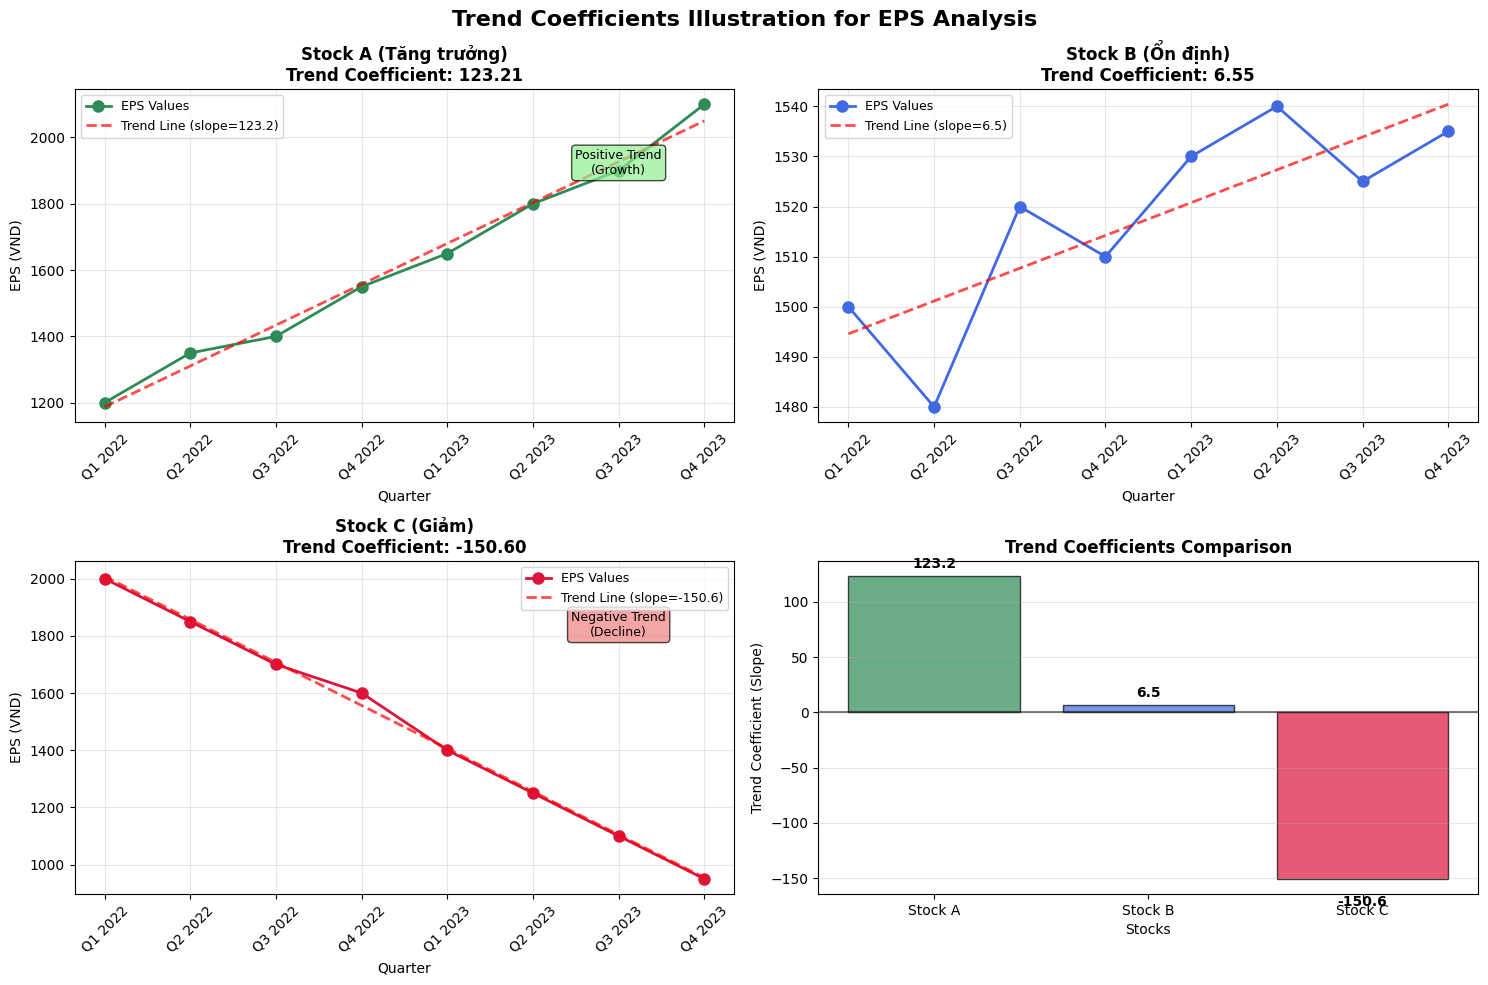

In [4]:
plot_eps_trend_illustration()

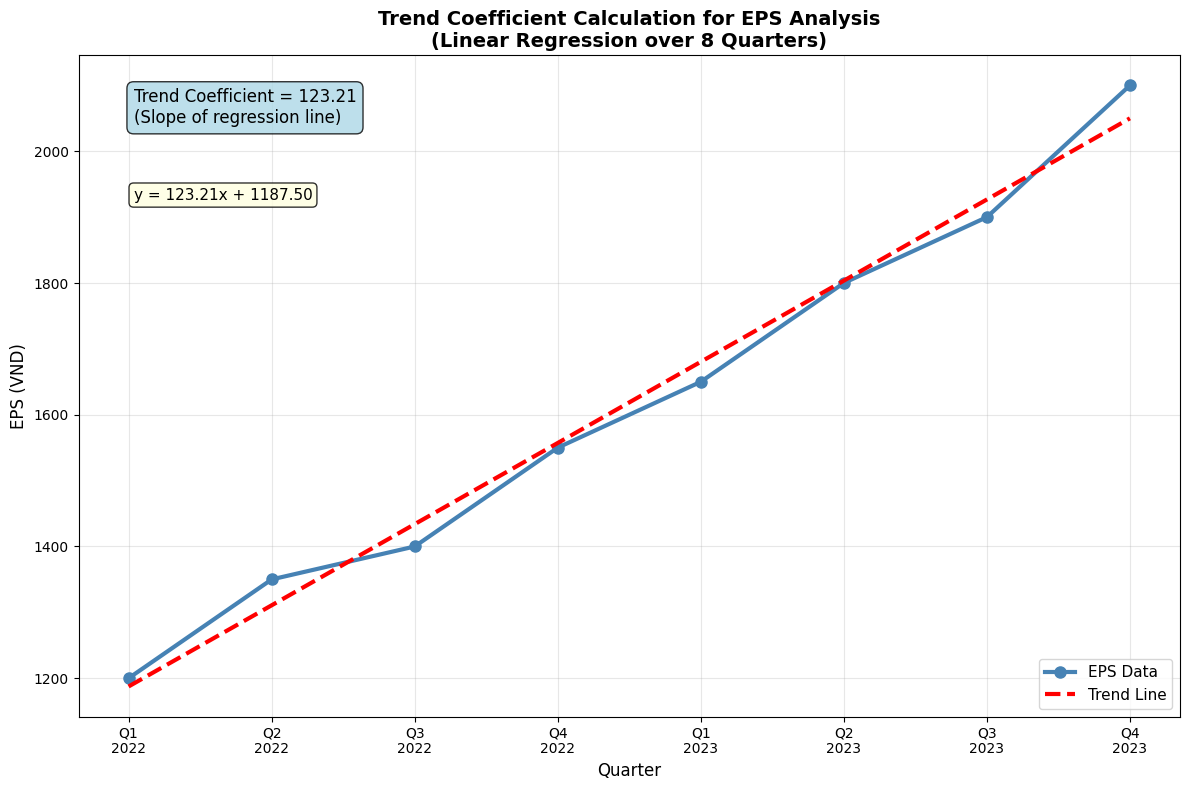

In [11]:
plot_feature_extraction_process()

In [16]:
def plot_feature_extraction_process():
    """
    Vẽ biểu đồ minh họa quá trình trích xuất features từ EPS data
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Dữ liệu ví dụ
    quarters = ['Q1\n2022', 'Q2\n2022', 'Q3\n2022', 'Q4\n2022', 
                'Q1\n2023', 'Q2\n2023', 'Q3\n2023', 'Q4\n2023']
    eps_values = [1200, 1350, 1400, 1550, 1650, 1800, 1900, 2100]
    
    # Trend Analysis
    x = np.arange(len(quarters))
    
    # Linear regression
    reg = LinearRegression()
    reg.fit(x.reshape(-1, 1), eps_values)
    trend_line = reg.predict(x.reshape(-1, 1))
    trend_coef = reg.coef_[0]
    
    ax.plot(quarters, eps_values, 'o', color='steelblue', linewidth=3, markersize=8, label='EPS Data')
    ax.plot(quarters, trend_line, '--', color='red', linewidth=3, label=f'Trend Line')
    ax.set_title('Trend Coefficient Calculation for EPS Analysis\n(Linear Regression over 8 Quarters)', 
                 fontweight='bold', fontsize=14)
    ax.set_ylabel('EPS (VND)', fontsize=12)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)
    ax.tick_params(axis='x', rotation=0)
    
    # Thêm công thức
    ax.text(0.05, 0.95, f'Trend Coefficient = {trend_coef:.2f}\n(Slope of regression line)', 
             transform=ax.transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.8))
    
    # Thêm equation
    ax.text(0.05, 0.80, f'y = {trend_coef:.2f}x + {reg.intercept_:.2f}', 
             transform=ax.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

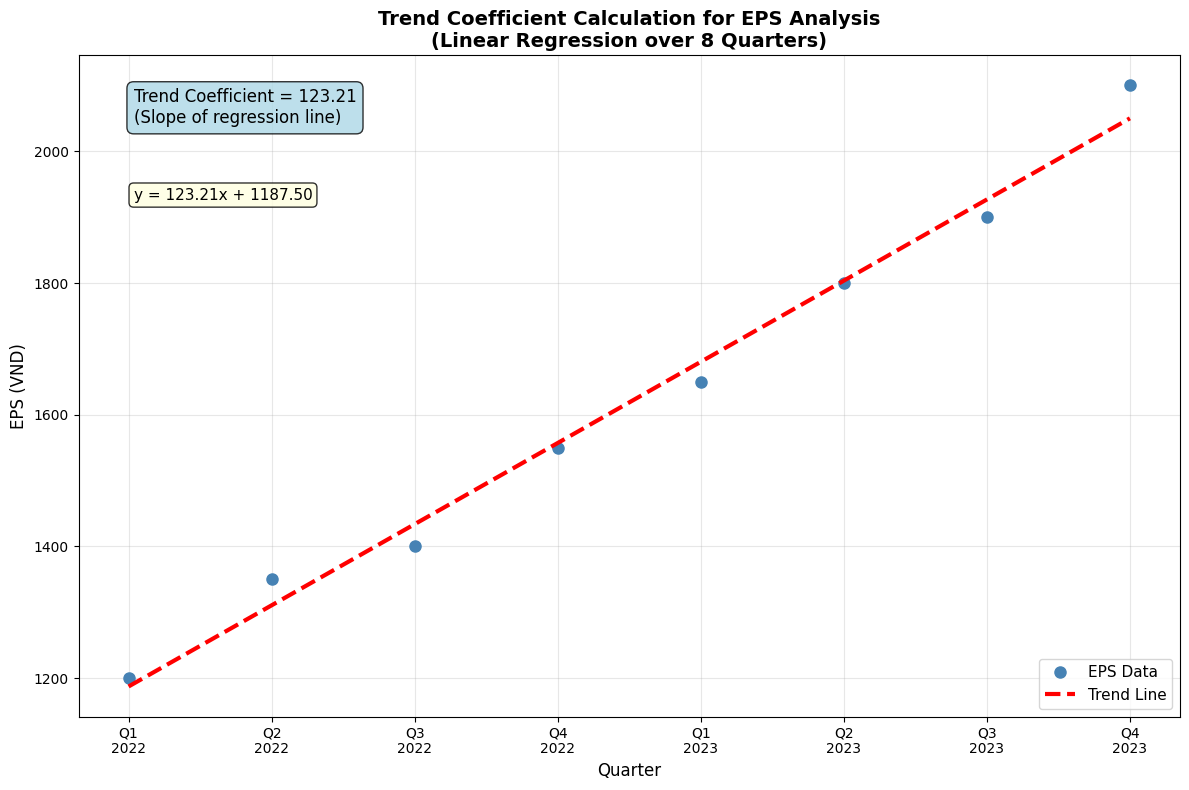

In [17]:
plot_feature_extraction_process()

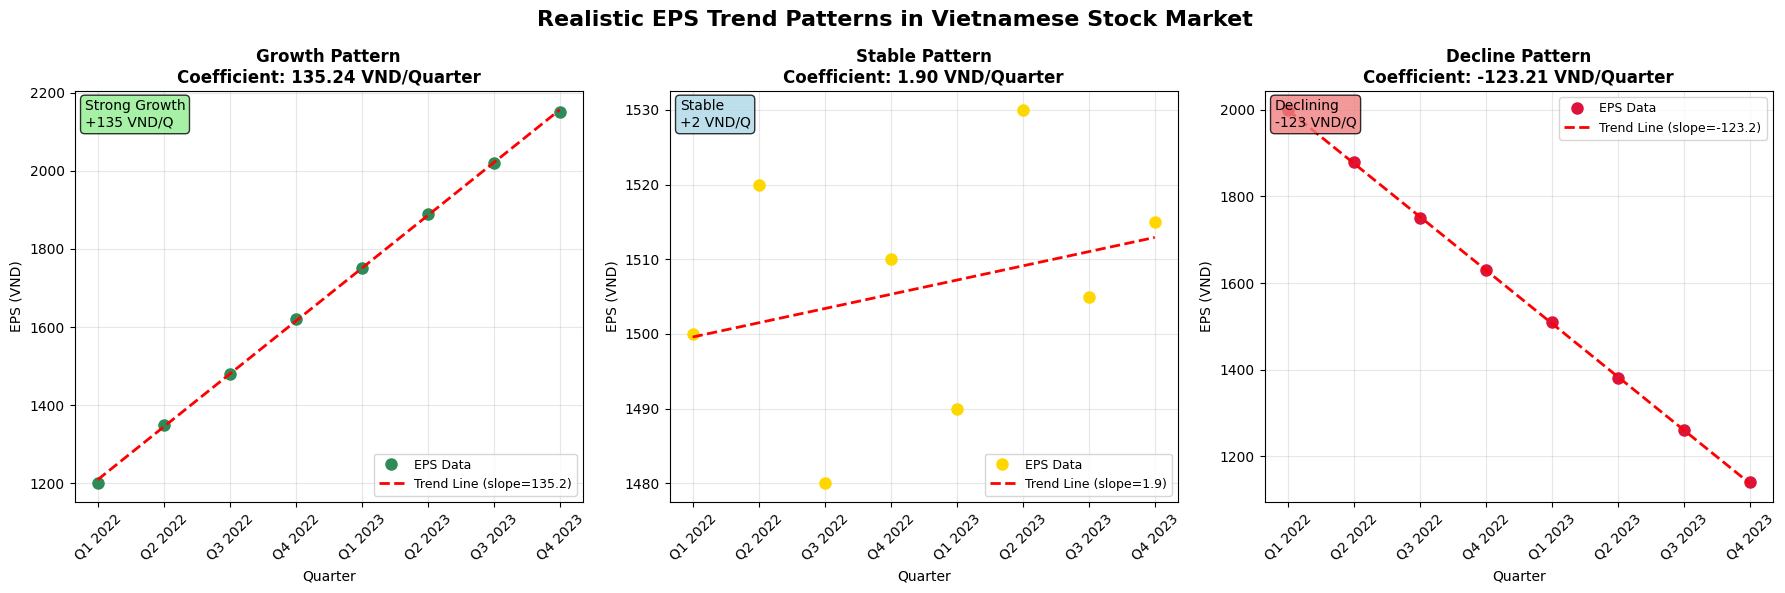

📊 Realistic Coefficient Ranges for VN30 Stocks:
🟢 Growth stocks: +100 to +150 VND/quarter
🟡 Stable stocks: -20 to +20 VND/quarter
🔴 Declining stocks: -100 to -150 VND/quarter


In [18]:
def plot_realistic_eps_trends():
    """
    Vẽ 3 xu hướng với coefficient realistic cho VN30
    """
    quarters = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 
                'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']
    
    # Dữ liệu realistic dựa trên VN30 patterns
    stocks_data = {
        'Strong Growth (VCB-style)': [1200, 1350, 1480, 1620, 1750, 1890, 2020, 2150],  # ~135/quý
        'Stable (VNM-style)': [1500, 1520, 1480, 1510, 1490, 1530, 1505, 1515],         # ~2/quý  
        'Decline (Commodity-style)': [2000, 1880, 1750, 1630, 1510, 1380, 1260, 1140]   # ~-123/quý
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Realistic EPS Trend Patterns in Vietnamese Stock Market', 
                 fontsize=16, fontweight='bold')
    
    colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
    trend_types = ['Growth', 'Stable', 'Decline']
    
    for idx, (stock_name, eps_values) in enumerate(stocks_data.items()):
        ax = axes[idx]
        
        # Linear regression
        x = np.arange(len(quarters)).reshape(-1, 1)
        y = np.array(eps_values)
        reg = LinearRegression()
        reg.fit(x, y)
        trend_coef = reg.coef_[0]
        trend_line = reg.predict(x)
        
        # Plot
        ax.plot(quarters, eps_values, 'o', color=colors[idx], markersize=8, label='EPS Data')
        ax.plot(quarters, trend_line, '--', color='red', linewidth=2, 
                label=f'Trend Line (slope={trend_coef:.1f})')
        
        # Formatting
        ax.set_title(f'{trend_types[idx]} Pattern\nCoefficient: {trend_coef:.2f} VND/Quarter', 
                     fontweight='bold', fontsize=12)
        ax.set_ylabel('EPS (VND)', fontsize=10)
        ax.set_xlabel('Quarter', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        ax.tick_params(axis='x', rotation=45)
        
        # Color-coded annotations
        if trend_coef > 50:
            color_box = 'lightgreen'
            text = f'Strong Growth\n+{trend_coef:.0f} VND/Q'
        elif abs(trend_coef) < 20:
            color_box = 'lightblue' 
            text = f'Stable\n{trend_coef:+.0f} VND/Q'
        else:
            color_box = 'lightcoral'
            text = f'Declining\n{trend_coef:.0f} VND/Q'
            
        ax.text(0.02, 0.98, text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
                facecolor=color_box, alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("📊 Realistic Coefficient Ranges for VN30 Stocks:")
    print("🟢 Growth stocks: +100 to +150 VND/quarter")
    print("🟡 Stable stocks: -20 to +20 VND/quarter") 
    print("🔴 Declining stocks: -100 to -150 VND/quarter")

# Chạy function
plot_realistic_eps_trends()

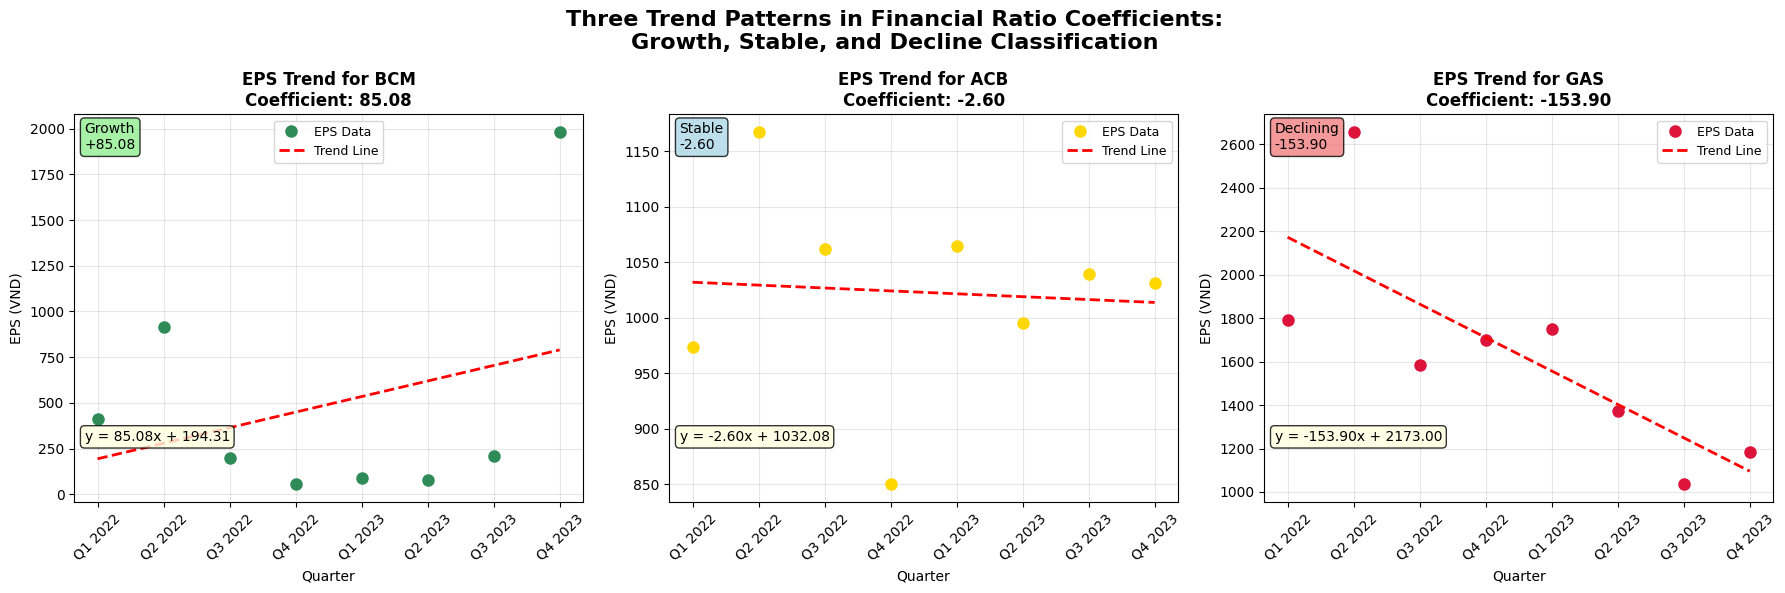

📊 Realistic Coefficient Ranges for VN30 Stocks:
Growth: y = 85.08x + 194.31
Stable: y = -2.60x + 1032.08
Decline: y = -153.90x + 2173.00


In [8]:
def plot_realistic_eps_trends():
    """
    Vẽ 3 xu hướng với coefficient realistic cho VN30
    """
    quarters = ['Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022', 
                'Q1 2023', 'Q2 2023', 'Q3 2023', 'Q4 2023']
    
    # Dữ liệu realistic dựa trên VN30 patterns
    stocks_data = {
        'BCM': [410.217692643478, 916.850037918841, 196.400212423188, 54.4043302753623, 88.4189544135266, 78.6872718483092, 210.020831108212, 1981.60620812947],  # ~135/quý
        'ACB': [973.38214014543, 1167.49778759775, 1062.04616822164, 849.910633397356, 1064.61776209545, 995.313047895349, 1039.52797411181, 1031.46937622687],         # ~2/quý  
        'GAS': [1791.41503986781, 2657.59002054965, 1582.71370675984, 1698.07864137987, 1750.44057912798, 1373.94309750659, 1035.01829460487, 1185.60109667919]   # ~-123/quý
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Three Trend Patterns in Financial Ratio Coefficients:\nGrowth, Stable, and Decline Classification', 
                fontsize=16, fontweight='bold')
    
    colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
    trend_types = ['Growth', 'Stable', 'Decline']
    
    for idx, (stock_name, eps_values) in enumerate(stocks_data.items()):
        ax = axes[idx]
        
        # Linear regression
        x = np.arange(len(quarters)).reshape(-1, 1)
        y = np.array(eps_values)
        reg = LinearRegression()
        reg.fit(x, y)
        trend_coef = reg.coef_[0]
        intercept = reg.intercept_
        trend_line = reg.predict(x)
        
        # Plot
        ax.plot(quarters, eps_values, 'o', color=colors[idx], markersize=8, label='EPS Data')
        ax.plot(quarters, trend_line, '--', color='red', linewidth=2, 
                label=f'Trend Line')
        
        # Formatting
        ax.set_title(f'EPS Trend for {stock_name}\nCoefficient: {trend_coef:.2f}', 
                     fontweight='bold', fontsize=12)
        ax.set_ylabel('EPS (VND)', fontsize=10)
        ax.set_xlabel('Quarter', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        ax.tick_params(axis='x', rotation=45)
        
        # Annotation với trend
        if trend_coef > 50:
            color_box = 'lightgreen'
            text = f'Growth\n+{trend_coef:.2f}'
        elif abs(trend_coef) < 20:
            color_box = 'lightblue' 
            text = f'Stable\n{trend_coef:+.2f}'
        else:
            color_box = 'lightcoral'
            text = f'Declining\n{trend_coef:.2f}'
            
        ax.text(0.02, 0.98, text, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
                facecolor=color_box, alpha=0.8))
        
        # Thêm phương trình riêng
        equation_text = f'y = {trend_coef:.2f}x + {intercept:.2f}'
        ax.text(0.02, 0.15, equation_text, transform=ax.transAxes, fontsize=10,
                verticalalignment='bottom', bbox=dict(boxstyle="round,pad=0.3", 
                facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary với equations
    print("📊 Realistic Coefficient Ranges for VN30 Stocks:")
    for idx, (stock_name, eps_values) in enumerate(stocks_data.items()):
        x = np.arange(len(quarters)).reshape(-1, 1)
        y = np.array(eps_values)
        reg = LinearRegression()
        reg.fit(x, y)
        trend_coef = reg.coef_[0]
        intercept = reg.intercept_
        print(f"{trend_types[idx]}: y = {trend_coef:.2f}x + {intercept:.2f}")

# Chạy function
plot_realistic_eps_trends()